In [1]:
using PyCall
using PyPlot
using LaTeXStrings
using LinearAlgebra


Bad key text.latex.unicode in file /home/arurz/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/arurz/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/arurz/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/

In [2]:
mp = pyimport("mpmath")
clrs = pyimport("matplotlib.colors")

PyObject <module 'matplotlib.colors' from '/home/arurz/.local/lib/python3.6/site-packages/matplotlib/colors.py'>

In [3]:
rc("text", usetex=true)

In [4]:
N = 32
dim = N+1

t_list = range(0,stop=10,length=61)

;

In [5]:
K0 = zeros(Float64,(dim,dim))
for j in 0:N
    K0[j+1,j+1]=((N/2)-j)
end

KP = zeros(Float64,(dim,dim))
for j in 0:N-1
    KP[j+1,j+2]=(N-j)
end

KM = zeros(Float64,(dim,dim))
for j in 0:N-1
    KM[j+2,j+1]=(j+1)
end

MD = zeros(Float64,(dim,dim))
for j in 0:N
    MD[j+1,j+1]=j
end

In [6]:
function cost(t)
    return cos(t*sqrt(2*MD))
end
;

In [7]:
function prop(t)
    return exp(KM)*exp(-KP/2)*cost(t)*exp(KP/2)*exp(-KM)
end
;

In [8]:
function pint(a)
    pv = zeros(Float64,dim)
    for j in 0:N
        if a == j
            pv[j+1] = 1
        else
            pv[j+1] = 0
        end
    end
    return pv
end
;

In [9]:
icond1 = normalize(pint(0));
icond2 = normalize(pint(8)+pint(24));
icond3 = normalize(pint(16));

In [10]:
A1=[]
for t = 1:length(t_list)
    append!(A1, normalize(prop(t_list[t])*icond1))
end

B1 = reshape(A1,33,:)

A2=[]
for t = 1:length(t_list)
    append!(A2, normalize(prop(t_list[t])*icond2))
end

B2 = reshape(A2,33,:)

A3=[]
for t = 1:length(t_list)
    append!(A3, normalize(prop(t_list[t])*icond3))
end

B3 = reshape(A3,33,:)

;

In [11]:
vminh=-1#minimum((minimum(B1),minimum(B2),minimum(B3)));
vmaxh=1#maximum((maximum(B1),maximum(B2),maximum(B3)));
(vminh,vmaxh)

(-1, 1)

In [12]:
nnorm = clrs.Normalize(vminh,vmaxh)

PyObject <matplotlib.colors.Normalize object at 0x7f74de186898>

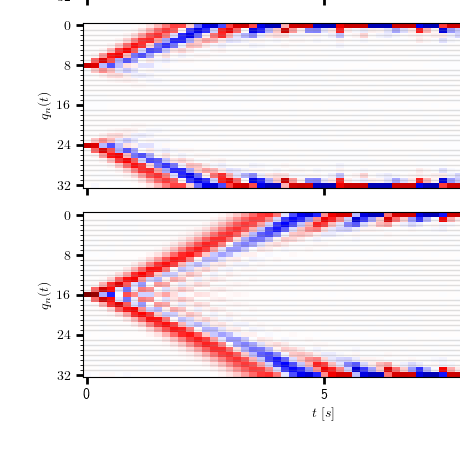

In [13]:
cm = "seismic"

ww = 6.20
hh = ww

fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(ww,hh),sharex=true)
plt.subplots_adjust(hspace = 0.1)

ax1.imshow(B1,vmin=vminh,vmax=vmaxh,cmap=cm)
ax2.imshow(B2,vmin=vminh,vmax=vmaxh,cmap=cm)
ax3.imshow(B3,vmin=vminh,vmax=vmaxh,cmap=cm)

ax1.set_aspect("auto")
ax2.set_aspect("auto")
ax3.set_aspect("auto")

ax1.tick_params(direction="out",length=5,width=2,labelsize=10)
ax2.tick_params(direction="out",length=5,width=2,labelsize=10)
ax3.tick_params(direction="out",length=5,width=2,labelsize=10)

ax1.set_yticks(0:8:N, minor = false)
ax2.set_yticks(0:8:N, minor = false)
ax3.set_yticks(0:8:N, minor = false)

ax3.set_xticks(0:30:61, minor = false)
ax3.set_xticklabels([0,5,10])

ax1.set_yticks(1:1:N, minor = true)
ax1.grid(which = "minor", color = "gray", linestyle = "-", linewidth = 1, alpha = 0.25)
ax2.set_yticks(1:1:N, minor = true)
ax2.grid(which = "minor", color = "gray", linestyle = "-", linewidth = 1, alpha = 0.25)
ax3.set_yticks(1:1:N, minor = true)
ax3.grid(which = "minor", color = "gray", linestyle = "-", linewidth = 1, alpha = 0.25)

ax1.set_ylabel(L"q_{n}(t)",fontsize=10)
ax2.set_ylabel(L"q_{n}(t)",fontsize=10)
ax3.set_ylabel(L"q_{n}(t)",fontsize=10)

ax3.set_xlabel(L"t\ [s]",fontsize=10)

pcm = ax1.get_children()[10]
cb = colorbar(pcm,ax=(ax1,ax2,ax3),extend="both",ticks=[-1,-0.5,0,0.5,1],orientation="vertical",shrink=0.7,aspect=35,fraction=0.015)
cb.ax.tick_params(labelsize=10,length=5,width=1,direction="inout")
#cb.ax.set_ylabel("Amplitud",fontsize=12,labelpad=0)

tight_layout(rect=(0, 0, 0.9, 1))
show()

savefig("binom_vd.pdf", transparent = "true", dpi=300, bbox_inches="tight", pad_inches=0)